# Campo Magnético de una carga Puntual

La ecuación de campo magnético para una carga puntual:

$${\vec B} = {\mu \over 4\pi} {{\vec v}x{\vec n_r}\over r^2} $$

Vamos a trabajar para el caso de una partícula que se mueve en dirección $y$.
$$\vec{v}=(0,v,0)$$

El campo magnético en coordenadas cartesianas (visto desde un sistema que se mueve con la partícula) es:
$${\vec B}={\mu_0\over 2\pi}{qv\over (x^{2}+y^{2}+z^{2})^{3/ 2}}(z{\vec i}-x{\vec k})$$

## Campo magnetico bidemensional

In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


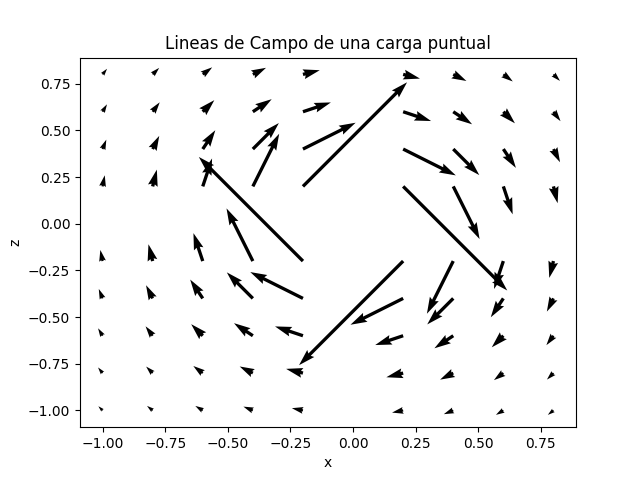

In [5]:
%matplotlib nbagg

q = 1.6*pow(10,-10) #[C]
mo = 4*(math.pi)*pow(10,-7) #[N*s^2/C^2], permitividad del vacio
v = 3*pow(10,5) #[m/s], velocidad de la partícula

#vectores undimensionales
x = np.arange(-1,1,0.2)
z = np.arange(-1,1,0.2)

#elimino los valores de 0 de los arrays ya que en esa zona el campo es nulo
pos_minx= np.where(min(abs(x))==(abs(x)))
pos_minz= np.where(min(abs(z))==(abs(z)))

#resscribo los arrays
x = np.delete(x,pos_minx)
z = np.delete(z,pos_minz)

#matriz de posicion. interpolacion de los vectores unidimensionales
X,Z = np.meshgrid(x,z)

#calculo las componentes del campo magnético (Bx, Bz)
Bx = pow(10,-7)*q*v*Z/pow(X**2+Z**2,3/2)
Bz = -pow(10,-7)*q*v*X/pow(X**2+Z**2,3/2)

#cambio la scala de los campos
Bx *=pow(10,10)
Bz *=pow(10,10)

#Grafico el campo vectorial
plt.quiver(X,Z,Bx,Bz)
plt.title("Lineas de Campo de una carga puntual")
plt.xlabel("x")
plt.ylabel("z")
plt.show()

Se puede observar que la intensdad del campo es mas fuerte en las cercanias de la carga 

## Campo magnetico en 3D

### Posicion de la carga en el origen del sistema

<IPython.core.display.Javascript object>


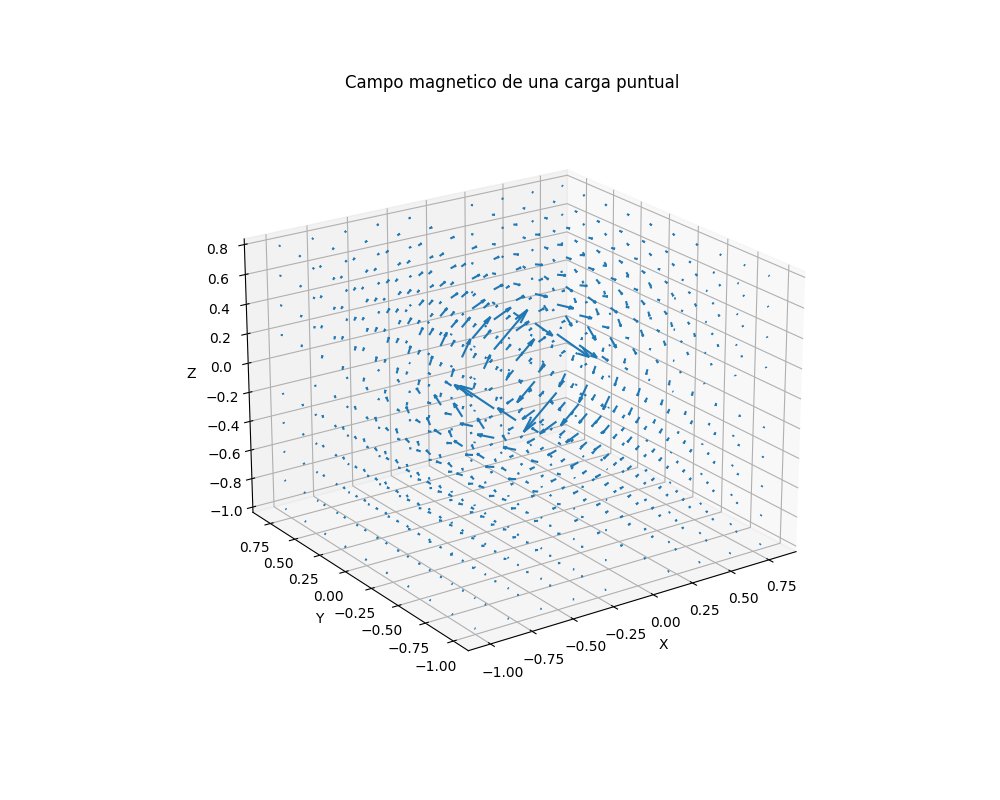

In [6]:
%matplotlib nbagg

q = 1.6*pow(10,-10) #[C]
mo = 4*(math.pi)*pow(10,-7) #[N*s^2/C^2], permitividad del vacio
v = 3*pow(10,5) #[m/s], velocidad de la partícula

#vectores undimensionales
x = np.arange(-1,1,0.2)
y = np.arange(-1,1,0.2)
z = np.arange(-1,1,0.2)

#elimino el valor cero o mas chico de los array, para que el campo no tienda a infinto
#Ademas el campo es Nulo en la posicion de la carga y en la direccion de su velocidad

pos_minx = np.where(min(abs(x)) == abs(x)) #convierto los valores a positiivos y busco la poscion del minimo.
#no hago lo mismo eon el array y, ya que da la posicion de los distintos planos de campo
#pos_miny = np.where(min(abs(y)) == abs(y))
pos_minz = np.where(min(abs(z)) == abs(z))

x = np.delete(x,pos_minx) #redefino los valores de los arrays
#y = np.delete(y,pos_miny)
z = np.delete(z,pos_minz)

#matriz de posicion. interpolacion de los vectores unidimensionales
X,Y,Z = np.meshgrid(x,y,z)

#calculo las componentes del campo magnético (Bx,0, Bz)
Bx = pow(10,-7)*q*v*Z/(X**2+Y**2+Z**2)**(3/2)
By = 0
Bz = -pow(10,-7)*q*v*X/(X**2+Y**2+Z**2)**(3/2)

#cambio de scala ya el orden de magnitud del campo es de 10^(-10)
Bx *=pow(10,10)
By *=pow(10,10)
Bz *=pow(10,10)

#Axes3D.quiver(x,y,z,bx,by,bz,length=0.1,normalize=True)
fig = plt.figure(num=None,figsize=(10,8))
ax = fig.gca(projection='3d')

ax.quiver(X, Y, Z, Bx, By, Bz, length= 0.5, normalize=False)
plt.title("Campo magnetico de una carga puntual")
plt.xlabel("X")
plt.ylabel("Y")
ax.set_zlabel("Z")
plt.show()

In [ ]:
x